# Boombikes - Bike-rental : Case Study

## Problem statement and approach for problem solving
This study is done to figure out the factors that influence the demand for the boombikes bike-sharing company. We are going to build a model that would predict the demand as accurately as possible from the pre-pandemic dataset. The predictions derived from the given features will be used by the management to understand market dynamics and strategize the business plans accordingly, to be the preferred bike-share company.

Our approach to solving the problem would be to build a model with the given features and predict the target (count of total rental bikes including both casual and registered), reliably. For this we would first understand the data, prepare the data, do the EDA. Then build a model with trainig data, evaluate it with test data. 

Based on the results, we would also answer the provided subjective questions.



## Solution

In [684]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Understanding and Preparation

In [685]:
# read the input data into a dataframe
bike=pd.read_csv(r"day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [686]:
# describe the data to get a quick feel of the stats
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Increase Readability of data

In [687]:
# rename column names
bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Understanding the metadata of data

In [688]:
# find out the datatype of the fields in the dataframe
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [689]:
# check for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [690]:
# look at the distinct count of values in each column
bike.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

#### Substituting the numerical values of Categorical variables with their literal values to make it human friendly

In [691]:
#map categorical columns with their literal values 
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# bike['year']=bike.year.map({0:2018,1:2019})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'MistCloudy',3:'LightSnow',4:'SnowFog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


After some sanity checks on data and working on the Categorical variables, we move on to visualizing data to understand the data further more

#### Pairplot visualization of numerical values

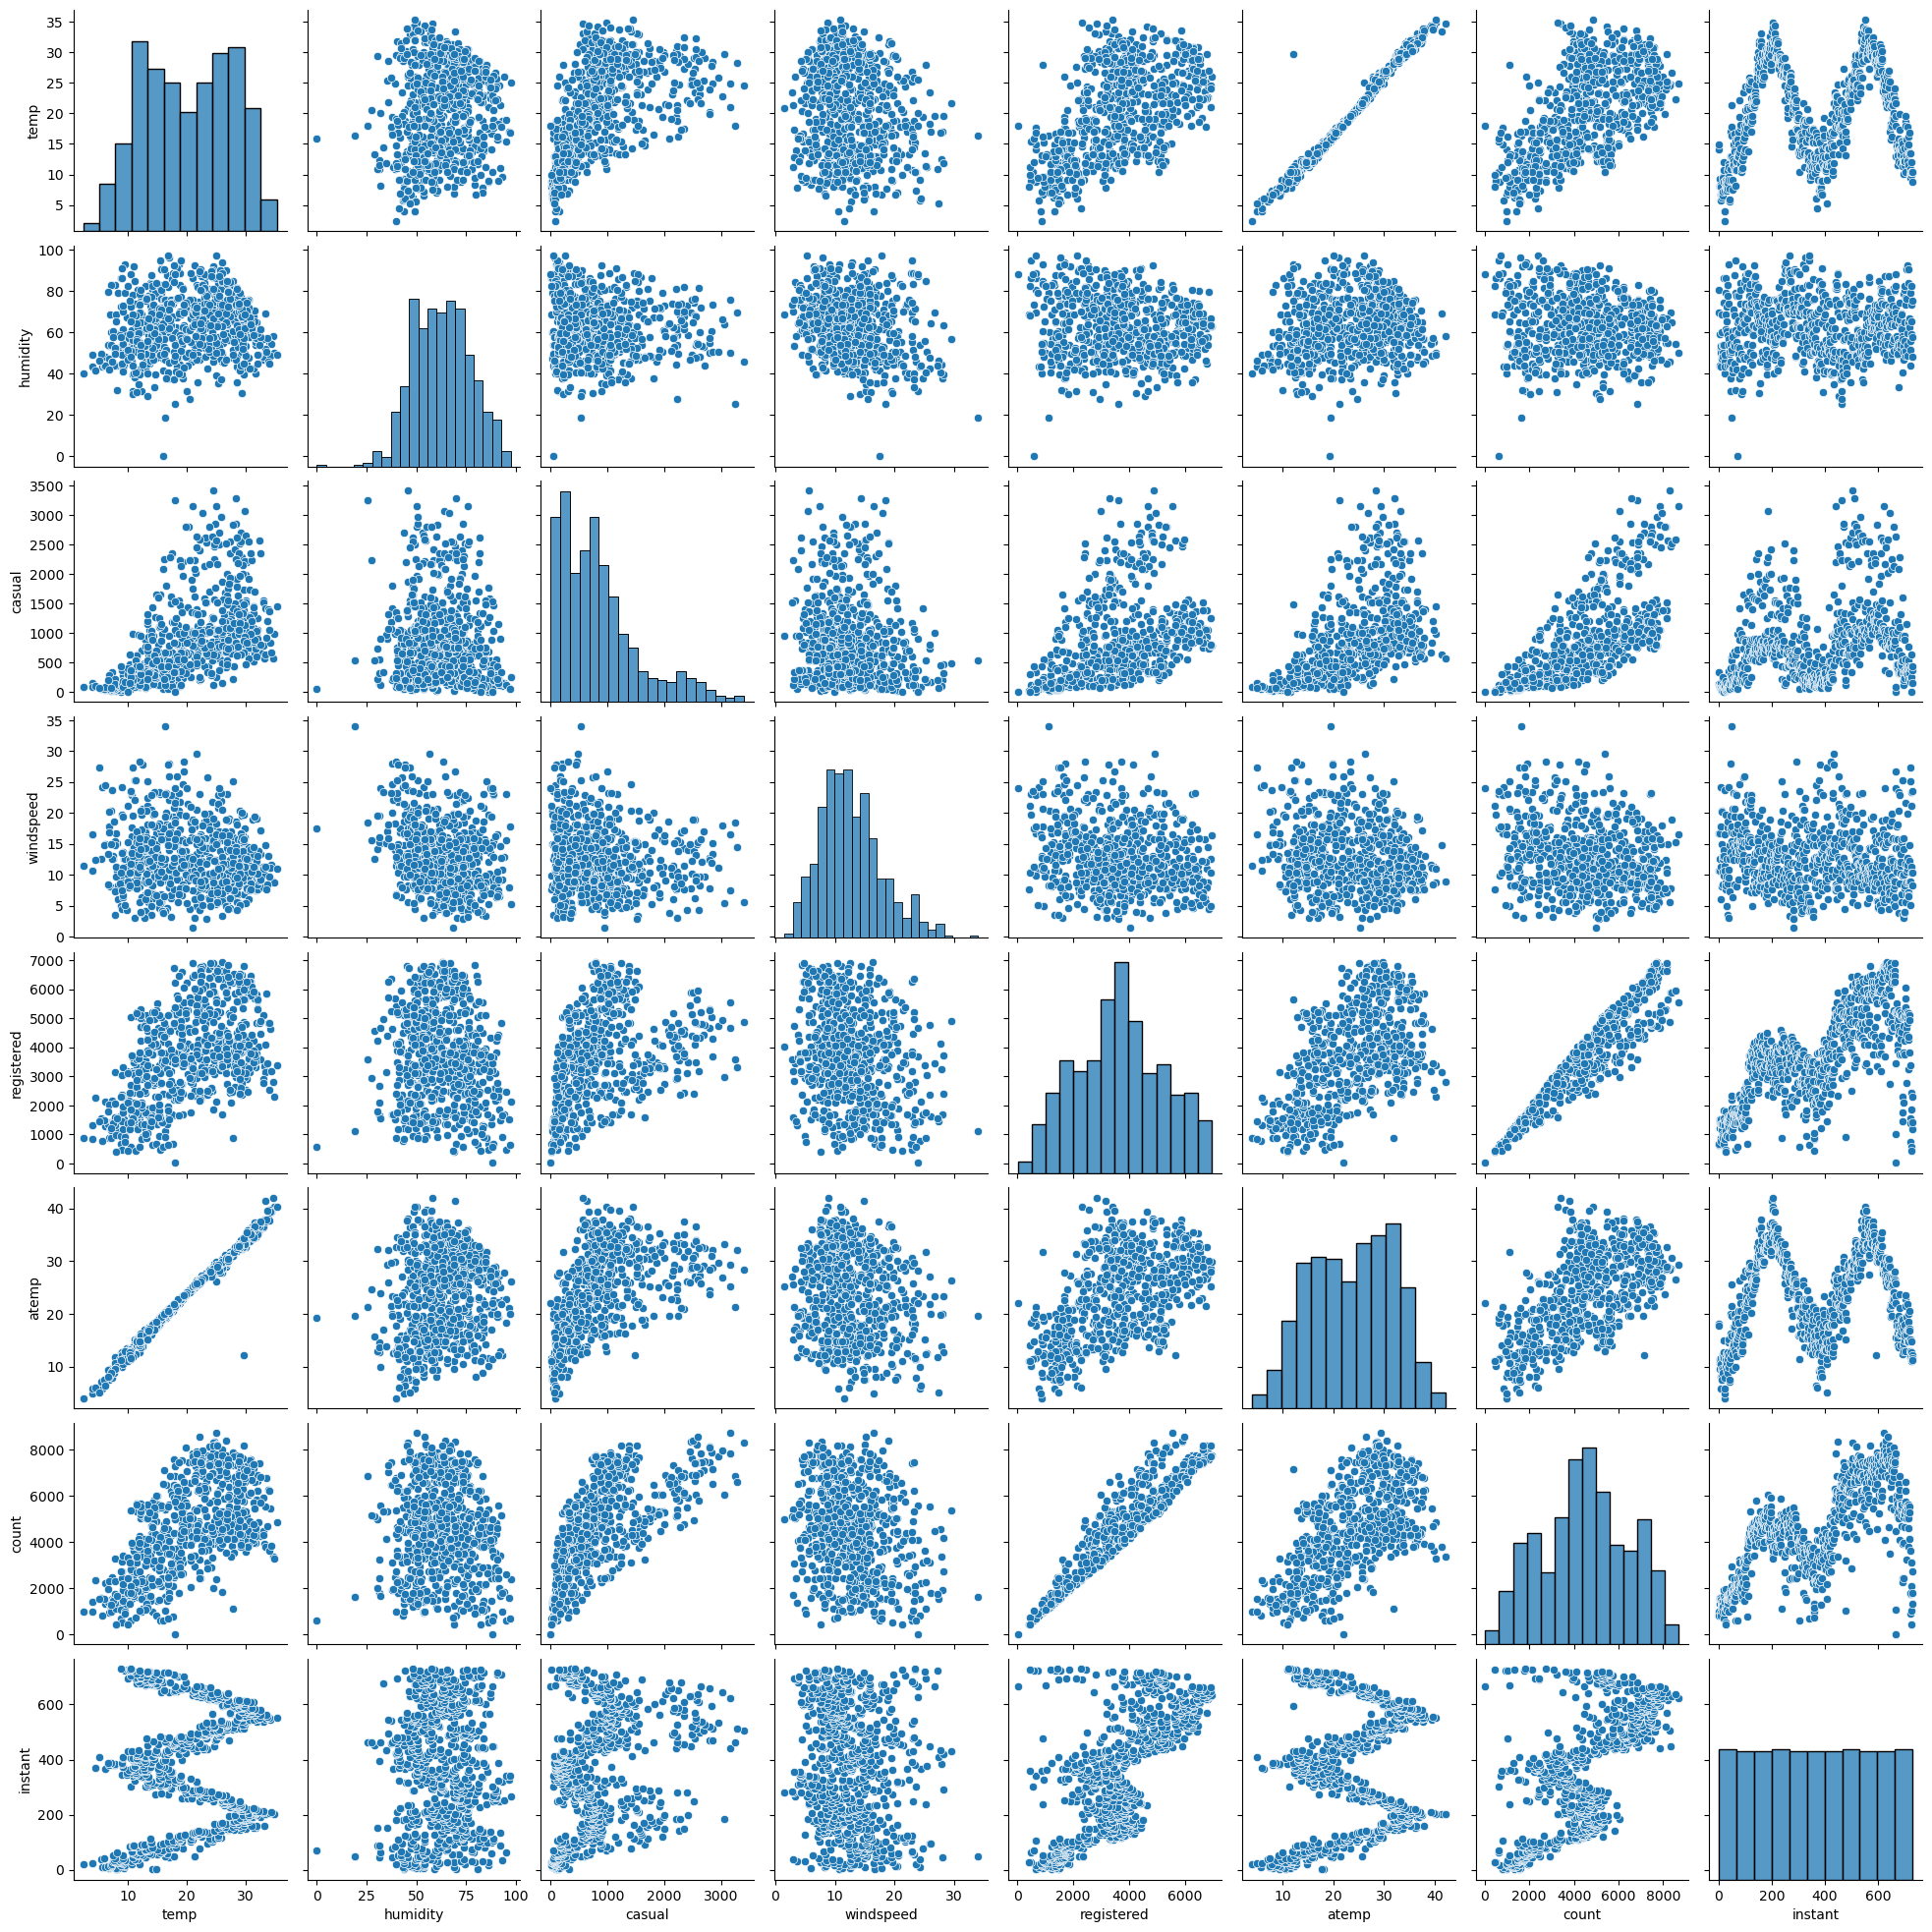

In [692]:
# pairplot of numerical columns
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

##### Analysis of pairplot
From the results above, correlations are found between 
- count and temperature 
- humidity and windspeed

These correlations dictate further exploration in relation to other variables

##### Exploring the relationship between registered,casual and count.

At the outset, it appears that the count is the sum of casual and registered rentals put together

In [693]:
#making sure that the count column is the sum of registered and casual users put together
bike[bike['registered']+bike['casual']!=bike['count']]

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count


from the result above, we understand that the count is merely a sum of registered and casual rentals. so the registered and casual variables are irrelevant for the model and can be dropped

#### Removing Variables that aren't necessary

- instant is removed because it is a counter and not necessary for analysis
- atemp is removed since feel like and temperature are related and cause multicollinearity
- dteday is removed because it is redundant in the form of year,month variables
- registered and casual removed to avoid multicollinearity since count is the sum of casual and registered rentals

In [694]:
# drop the redundant and non-significant variables
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,MistCloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,MistCloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


#### Exploring Categorical Variables

In [695]:
bike

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,MistCloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,MistCloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,MistCloudy,10.420847,65.2917,23.458911,2114
726,spring,1,Dec,0,Fri,1,MistCloudy,10.386653,59.0000,10.416557,3095
727,spring,1,Dec,0,Sat,0,MistCloudy,10.386653,75.2917,8.333661,1341
728,spring,1,Dec,0,Sun,0,Clear,10.489153,48.3333,23.500518,1796


In [696]:
#print only categorical columns to indentify them first
print(bike.select_dtypes(exclude=['int64','float64','datetime64']))

     season month weekday  weathersit
0    spring   Jan     Sat  MistCloudy
1    spring   Jan     Sun  MistCloudy
2    spring   Jan     Mon       Clear
3    spring   Jan     Tue       Clear
4    spring   Jan     Wed       Clear
..      ...   ...     ...         ...
725  spring   Dec     Thu  MistCloudy
726  spring   Dec     Fri  MistCloudy
727  spring   Dec     Sat  MistCloudy
728  spring   Dec     Sun       Clear
729  spring   Dec     Mon  MistCloudy

[730 rows x 4 columns]


##### Box plot of categorical values

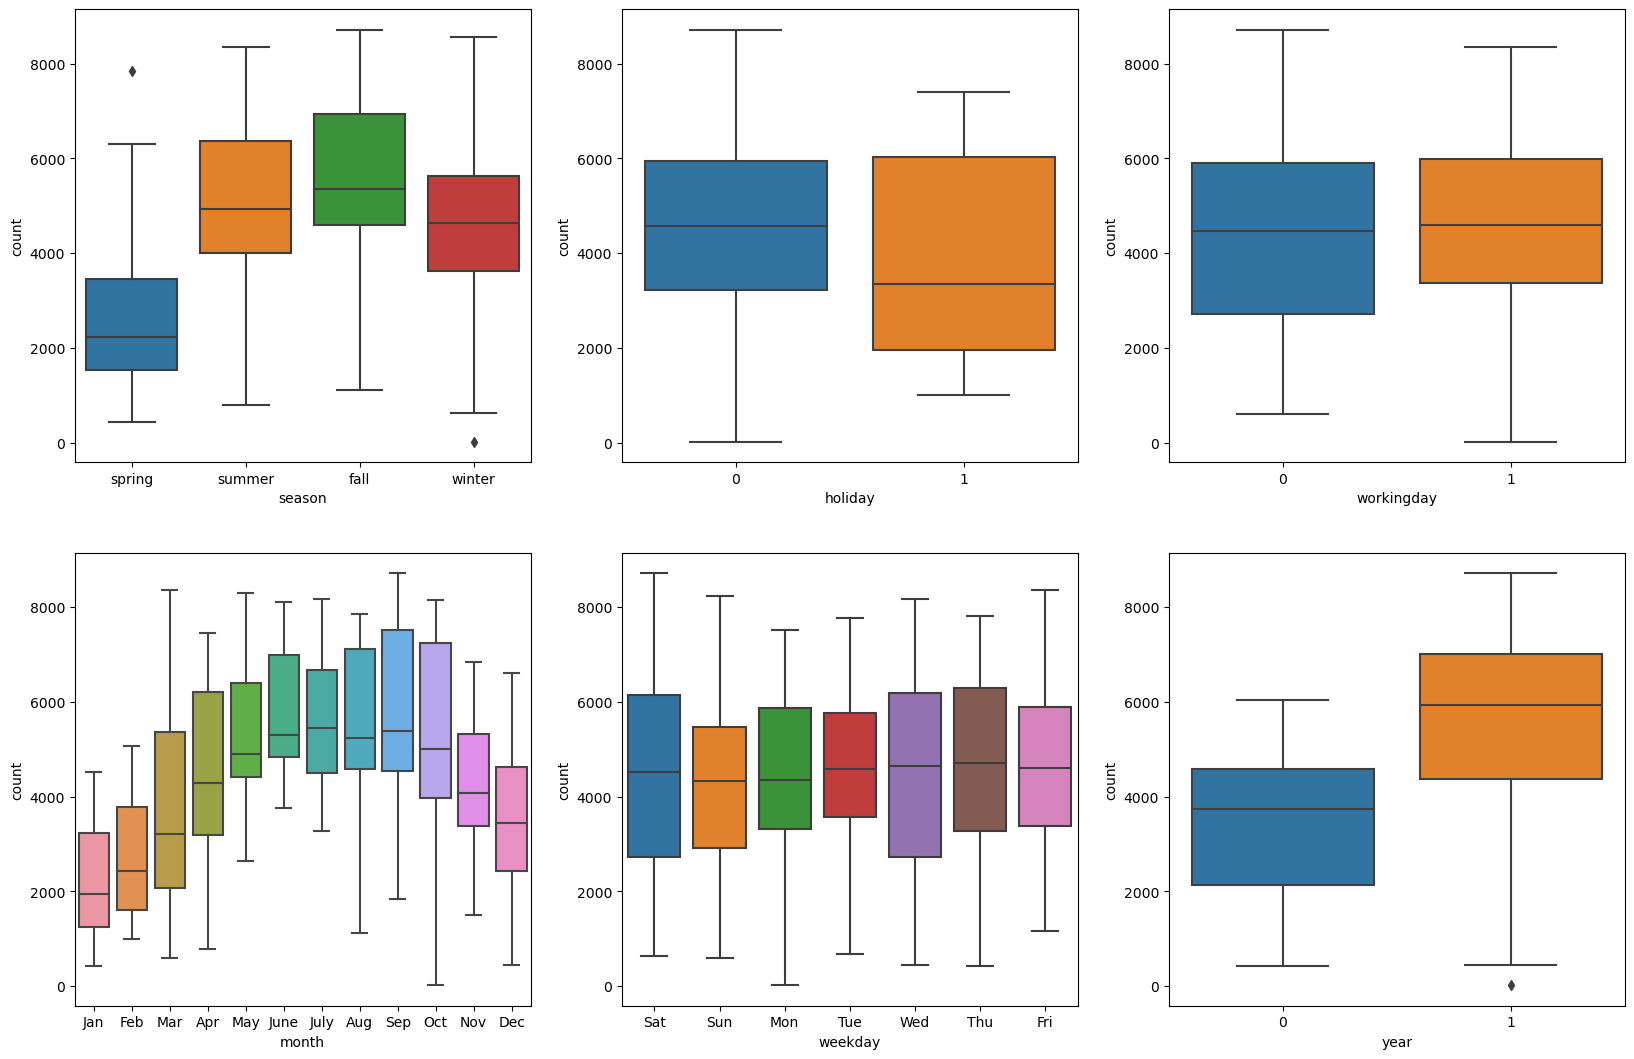

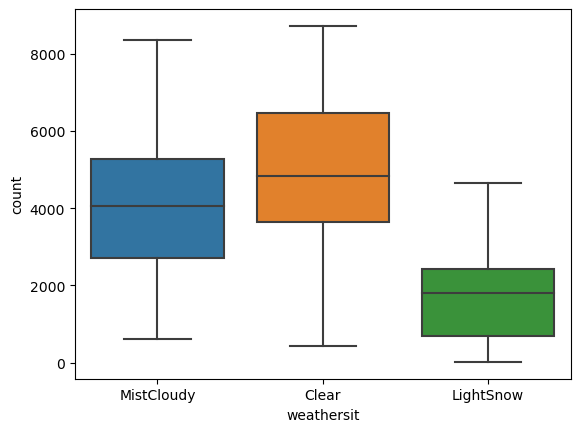

In [697]:

plt.figure(figsize=(20, 20))  
#display 3 plots per row
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.show()
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.show()

##### Observations: 
_Season Vs count_ : 
The count changes as seasons change - this variable has potential 

_Holiday Vs count_ : 
There is a difference between categories here. this variable has potential 

_Workingday Vs count_ : 
Workingday and holiday seem to be overlapping and corrleated. this is not significant for the model 

_month Vs count_ : 
There is change in values and a trend to look for here. also the month and season look like are highly correlated. probable cause for elimination of one of them

_weekday Vs count_ : 
Slight change in values. probably a candidate for elimination 

_year Vs count_ : 
demand has grown in 2019. this variable is probably significant. 

_weather situation Vs Count_ : 
There is a significant correlation between weather and demand, people preferring clear weather days to rent bikes.

#### Removing some more variables

One more iteration of removing the variables that arent significant for the model

##### Heatmap: Correlation of Variables

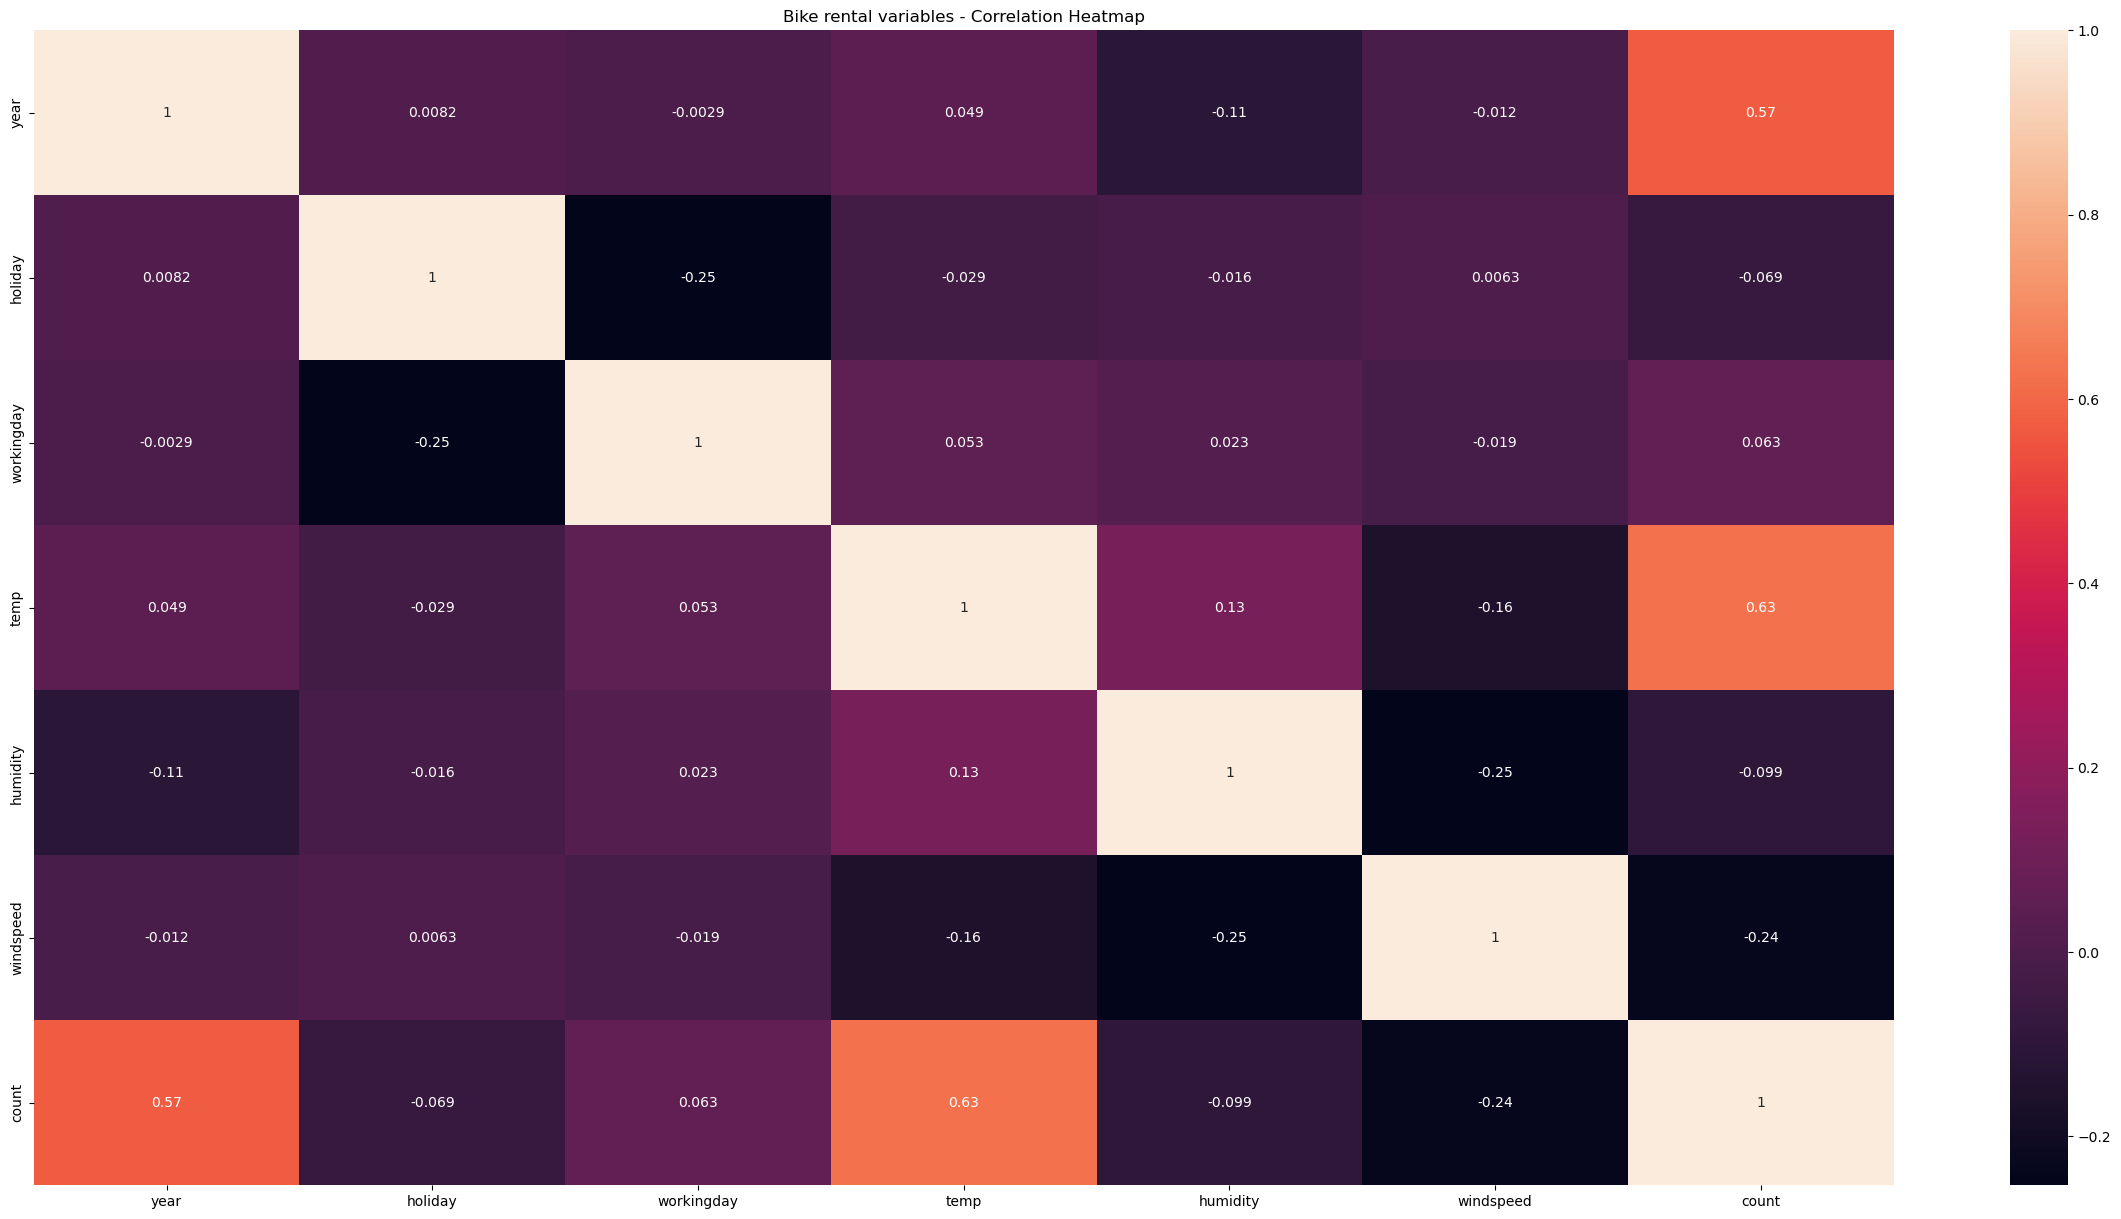

In [698]:
plt.figure(figsize=(30, 15))
sns.heatmap(bike.corr(), annot = True)
plt.title("Bike rental variables - Correlation Heatmap")
plt.show()

From the heatmap we understand that there is corelation between count and temp, a little between working day and count.. 

##### Dummy values for categorical columns

In [699]:
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,MistCloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,MistCloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [700]:
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


##### Heatmap with the dummy variables included

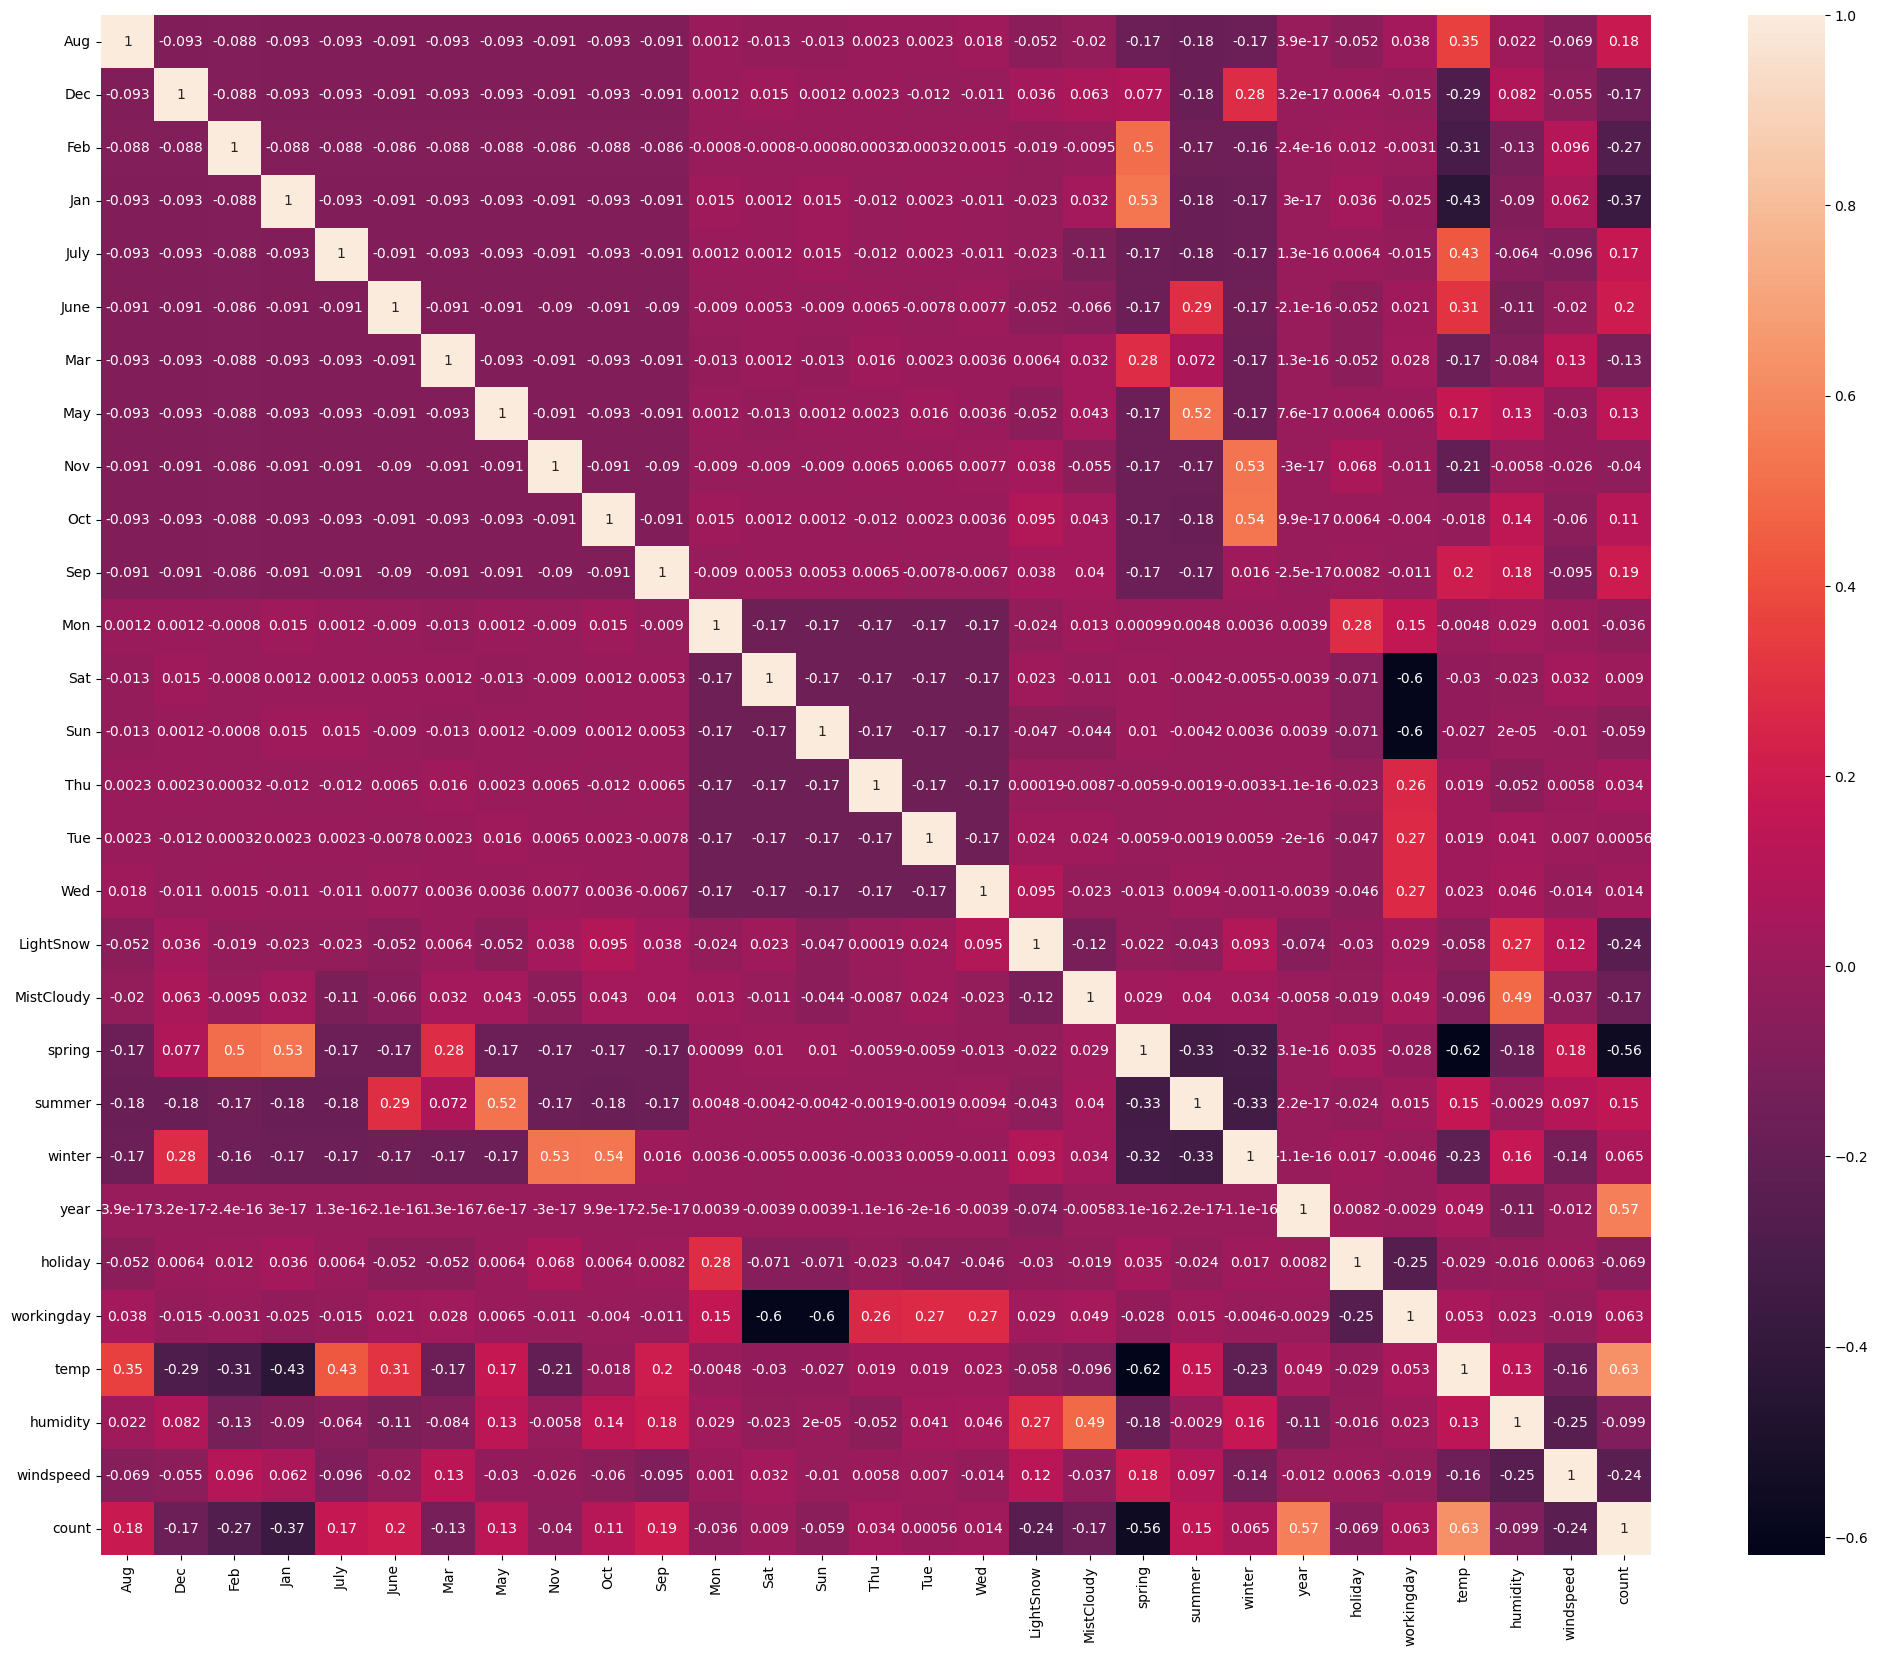

In [701]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(),  annot = True)
plt.show()

In [702]:
from sklearn.model_selection import train_test_split

##### Train/Test split

In [703]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [704]:
from sklearn.preprocessing import MinMaxScaler

##### scaling numerical columns

In [705]:
scaler = MinMaxScaler()
numeric_vars=['temp','humidity','windspeed','count']
bike_train[numeric_vars] = scaler.fit_transform(bike_train[numeric_vars])
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


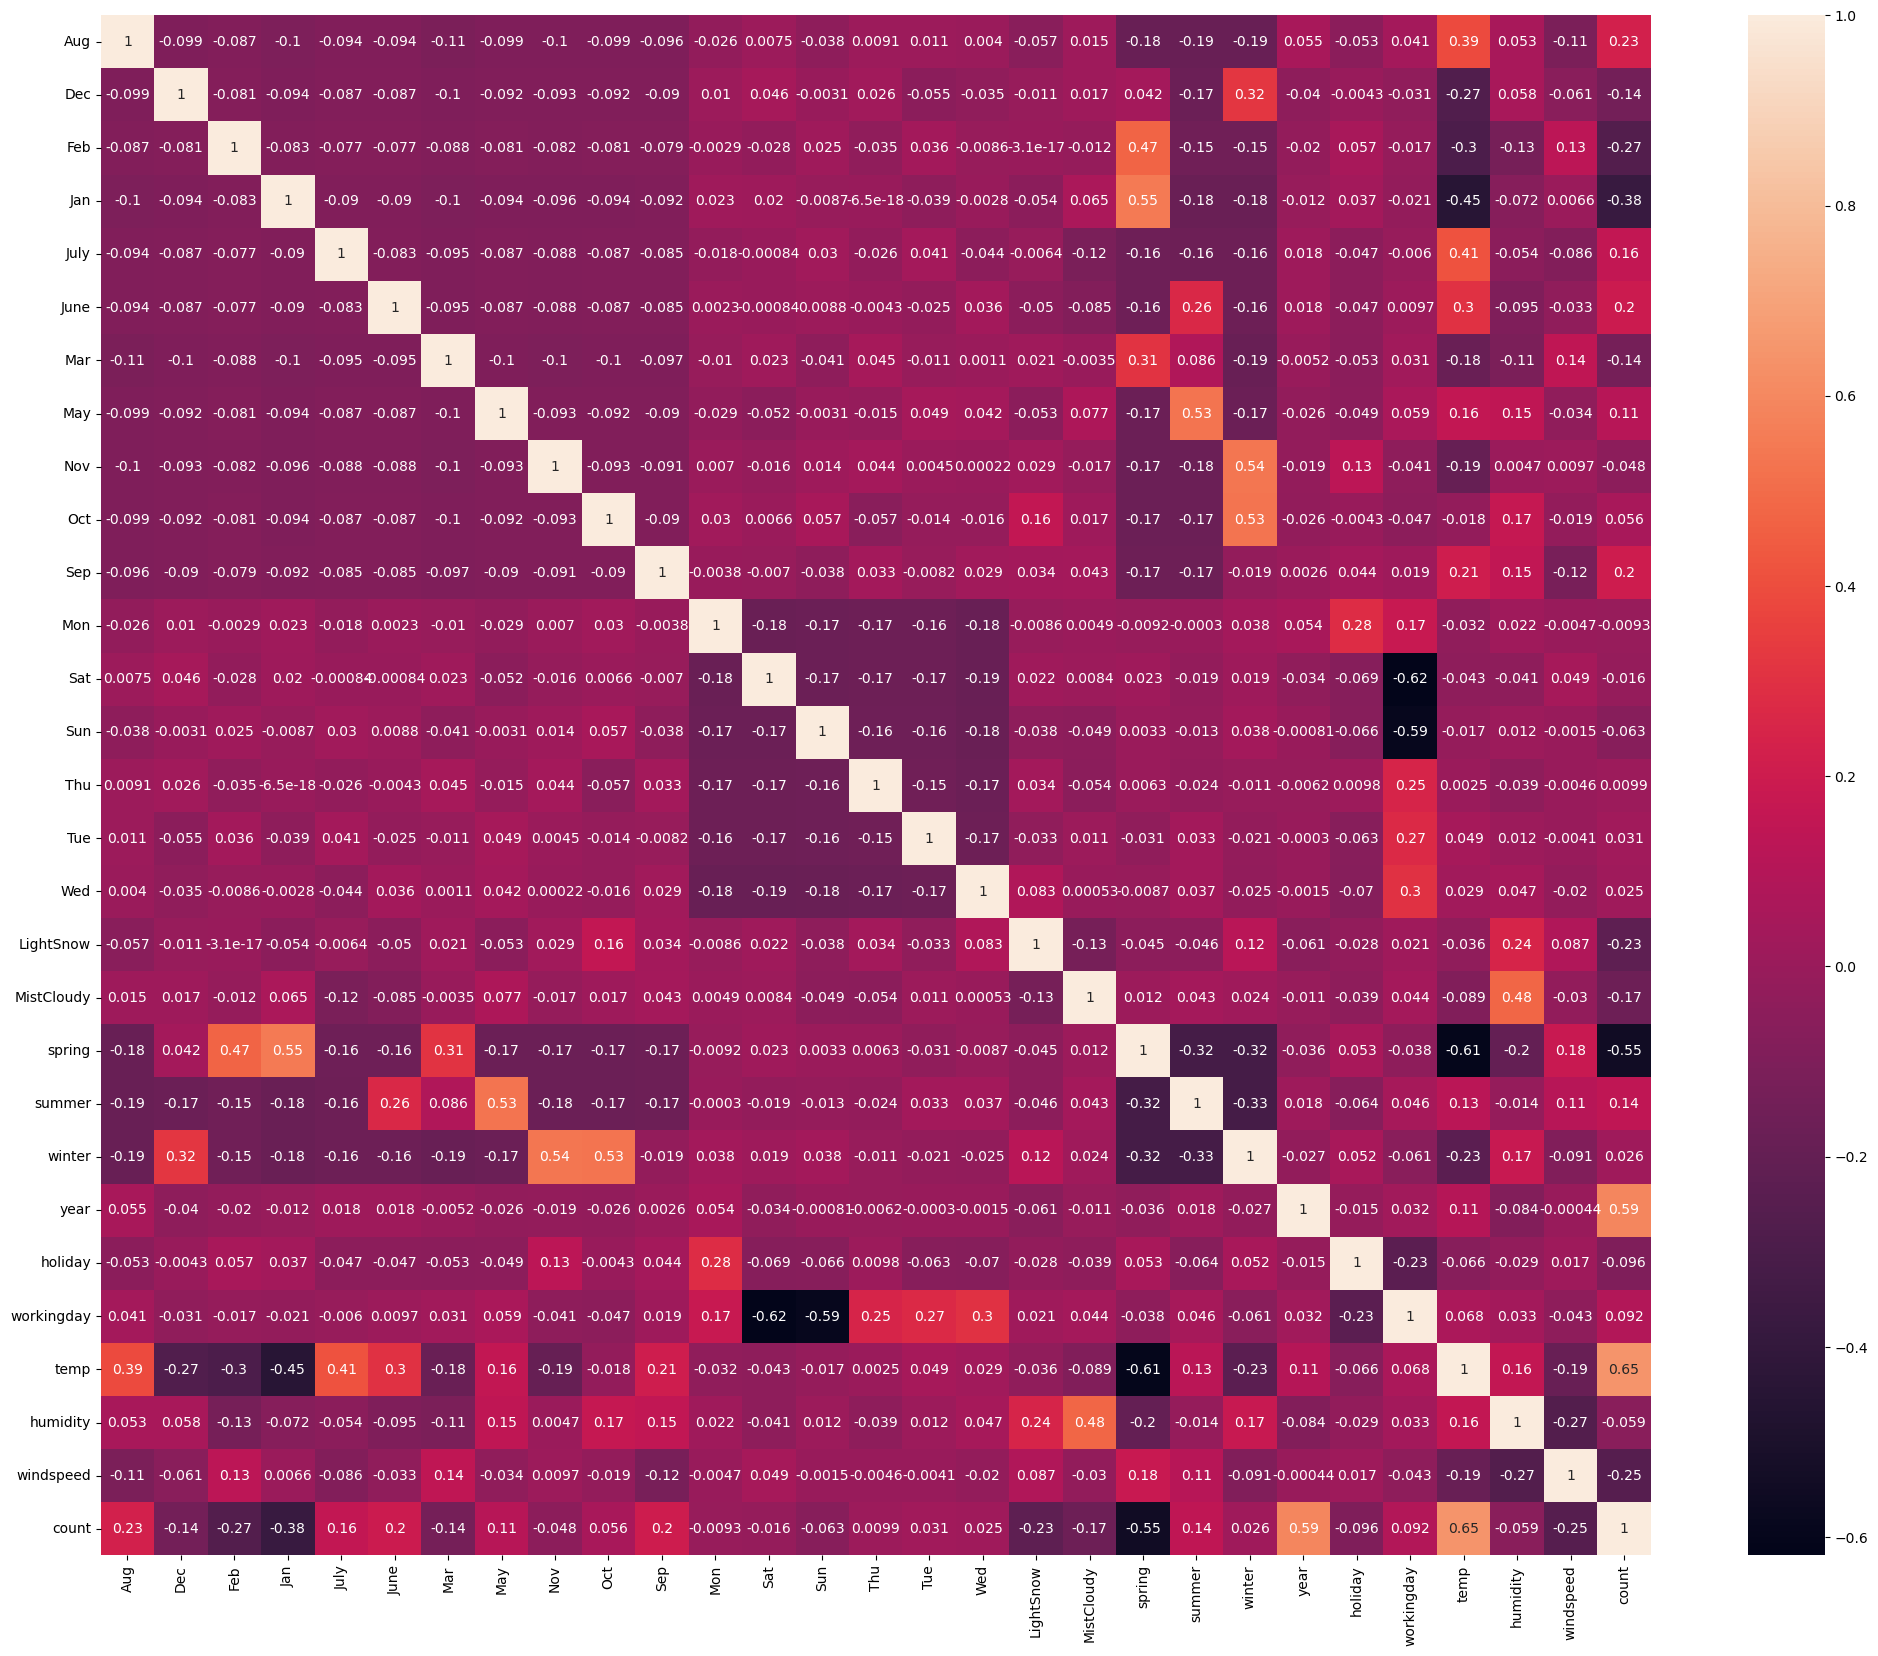

In [706]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(), annot = True)
plt.show()

In [707]:
#creating X train and y train
y_train = bike_train.pop('count')
X_train = bike_train

#verifying the created training data set
print(y_train.head())
print(X_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64
     Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  MistCloudy  \
576    0    0    0    0     1     0    0    0    0    0  ...           0   
426    0    0    0    0     0     0    1    0    0    0  ...           1   
728    0    1    0    0     0     0    0    0    0    0  ...           0   
482    0    0    0    0     0     0    0    0    0    0  ...           1   
111    0    0    0    0     0     0    0    0    0    0  ...           1   

     spring  summer  winter  year  holiday  workingday      temp  humidity  \
576       0       0       0     1        0           1  0.815169  0.725633   
426       1       0       0     1        0           0  0.442393  0.640189   
728       1       0       0     1        0           0  0.245101  0.498067   
482       0       1       0     1        0           0  0.395666  0.504508   
111       0       1       0     0        0   

In [708]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

##### find significant predictor columns

In [709]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 8),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 5),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('LightSnow', True, 1),
 ('MistCloudy', False, 12),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [710]:
import statsmodels.api as sm  
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Sun', 'LightSnow', 'spring', 'summer',
       'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [711]:
X_train_rfe = X_train[col]

#### Reference regression fit 

In [712]:
X_train_rfe = sm.add_constant(X_train_rfe)

X_train_rfe.head()

,const,Jan,July,Sep,Sat,Sun,LightSnow,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
576,1.0,0,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,0,0,0,1,0,0,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,1,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,1,0,0,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0.345824,0.751824,0.380981


In [734]:
lm = sm.OLS(endog=y_train, exog=X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          4.93e-186
Time:                        23:25:38   Log-Likelihood:                 504.82
No. Observations:                 510   AIC:                            -979.6
Df Residuals:                     495   BIC:                            -916.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Jan           -0.0346      0.018     -1.941      0.0

#### VIF analyis for multicollinearity in predictor columns

In [714]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [715]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.31
3,Sat,12.15
4,Sun,11.57
6,spring,5.05
12,temp,3.74
8,winter,3.54
10,holiday,2.87
7,summer,2.64
0,Jan,1.57
1,July,1.49


Jan has high probability value. So dropping July. 

In [716]:
#Drop July
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.67e-185
Time:                        23:24:54   Log-Likelihood:                 500.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     496   BIC:                            -914.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2317      0.028      8.200      0.0

In [717]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,49.67
2,Sat,11.99
3,Sun,11.39
5,spring,4.86
11,temp,3.64
7,winter,3.35
9,holiday,2.85
6,summer,2.32
0,Jan,1.56
12,humidity,1.27


Now holiday has high probability. Dropping holiday to refit the model

In [718]:
#Drop holiday
X_train_new2 = X_train_lm1.drop(["holiday"], axis = 1)
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.67e-185
Time:                        23:24:54   Log-Likelihood:                 500.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     496   BIC:                            -914.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2269      0.043      5.274      0.0

In [719]:
X_train_lm2=X_train_lm2.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,22.52
9,workingday,18.37
10,temp,16.67
2,Sat,4.90
12,windspeed,4.89
3,Sun,4.70
5,spring,4.67
7,winter,3.36
6,summer,2.65
8,year,2.09


We can see using humidity is having high VIF value and so it is dependant other predictors. So we will drop humidity and refit the model and generate VIF to further narrow down on required predictors.

In [720]:
#Drop the humidity column
X_train_new3=X_train_lm2.drop(['humidity'],axis=1)
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.64e-172
Time:                        23:24:54   Log-Likelihood:                 466.70
No. Observations:                 510   AIC:                            -907.4
Df Residuals:                     497   BIC:                            -852.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0849      0.042      2.008      0.0

In [721]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,16.19
10,temp,12.25
11,windspeed,4.79
2,Sat,4.45
3,Sun,4.22
5,spring,4.03
7,winter,2.55
6,summer,2.35
8,year,2.08
0,Jan,1.64


Working day can be dropped

In [722]:
#Drop the workingday column
X_train_new4=X_train_lm3.drop(['workingday'],axis=1)
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     192.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.48e-171
Time:                        23:24:54   Log-Likelihood:                 461.65
No. Observations:                 510   AIC:                            -899.3
Df Residuals:                     498   BIC:                            -848.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1713      0.032      5.276      0.0

In [723]:
X_train_lm4=X_train_lm4.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,windspeed,4.63
9,temp,3.88
5,spring,2.60
8,year,2.07
6,summer,1.86
0,Jan,1.59
7,winter,1.58
2,Sat,1.22
1,Sep,1.21
3,Sun,1.21


we see that spring can be dropped

In [724]:
#Drop the spring column
X_train_new5=X_train_lm4.drop(['spring'],axis=1)
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.52e-171
Time:                        23:24:54   Log-Likelihood:                 459.38
No. Observations:                 510   AIC:                            -896.8
Df Residuals:                     499   BIC:                            -850.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1186      0.021      5.691      0.0

const can be dropped

In [725]:
X_train_lm5=X_train_lm5.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.80
9,windspeed,3.33
7,year,2.04
5,summer,1.59
6,winter,1.39
2,Sat,1.21
1,Sep,1.20
3,Sun,1.20
0,Jan,1.18
4,LightSnow,1.06


This seems like a valid choice of predictors as VIF for all is less than 5. We will use these predictors for further use.

In [726]:
X_train_lm5=sm.add_constant(X_train_new5)
X_train_new5

,Jan,Sep,Sat,Sun,LightSnow,summer,winter,year,temp,windspeed
576,0,0,0,0,0,0,0,1,0.815169,0.264686
426,0,0,1,0,0,0,0,1,0.442393,0.255342
728,0,0,0,1,0,0,0,1,0.245101,0.663106
482,0,0,1,0,0,1,0,1,0.395666,0.188475
111,0,0,0,0,0,1,0,0,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,1,0.863973,0.187140
53,0,0,0,0,0,0,0,0,0.202618,0.111379
350,0,0,1,0,0,0,1,0,0.248216,0.431816
79,0,0,0,0,0,1,0,0,0.462664,0.529881


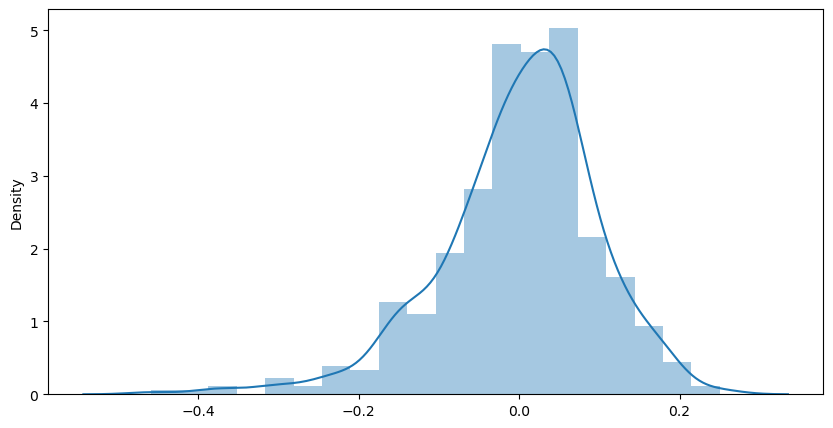

In [727]:
y_train_pred = lm5.predict(X_train_lm5)
plt.figure(figsize=(10,5))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.show()

#####  From the plot above we can see that error distribution for our model on train set has mean close to 0 and error terms are normally distributed.
- R-squared:0.835 i.e. 83% data in train set can be explained using the predictors in our model
- Adj. R-squared:0.832
- F-statistic:253.0- F-statistic value is quite high so we can say its a good model

### Preparing test data set

Using MinMax caler from train data on test set

In [728]:
numeric_vars=['temp','humidity','windspeed','count']
bike_test[numeric_vars] = scaler.transform(bike_test[numeric_vars])
bike_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [729]:
y_test = bike_test.pop('count')
X_test = bike_test
X_test_new = X_test[X_train_new5.columns]
X_test_new1 = sm.add_constant(X_test_new)
y_pred = lm5.predict(X_test_new1)

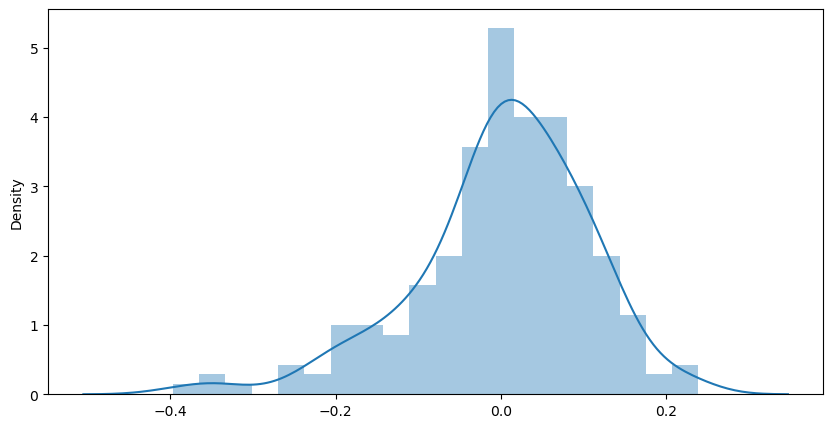

In [730]:
plt.figure(figsize=(10,5))
sns.distplot((y_test - y_pred), bins = 20)
plt.show()

From the plot above we can see the error distribution for our model on test data set has mean close to 0 and error terms are normally distributed.

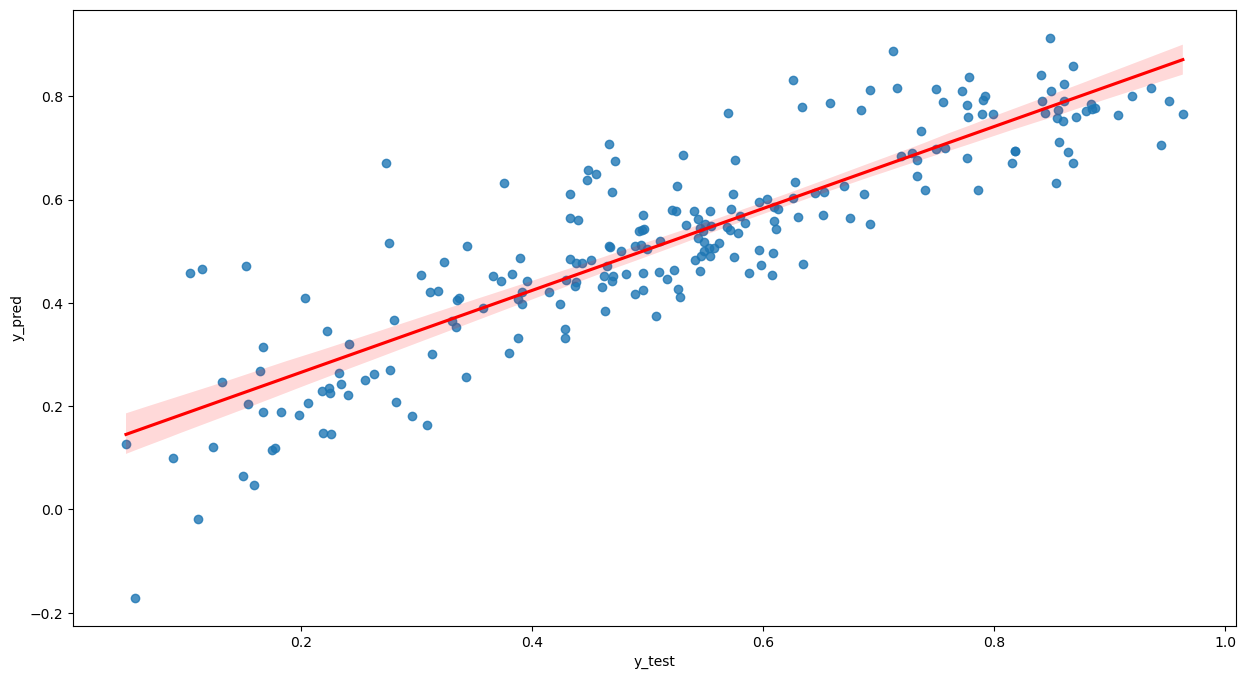

In [731]:
#y_pred vs y_test
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, fit_reg=True,line_kws={"color": "red"})
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [732]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.7651076115483442

r2 score on the test set is 0.7961390438459764.

In [733]:
#finding out the mean squared error 
from sklearn.metrics import mean_squared_error
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.009663761007665545
Mean squared error of the test set is 0.011231210315603427


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance in both the test and train datasets

##### Equation of the best fitted line is:
- cnt=0.0974×Sep + 0.0675×Sat - 0.2871×LightSnow - 0.0800×MistCloudy + 0.0886×summer+ 0.1307×winter+ 0.2331×year+ 0.0561×workingday+ 0.5499×temp - 0.1552×windspeed+0.0750

### Summary:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1. The R-squared value of the train set is 83% whereas the test set has a value of 79.6% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

2. Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of predictors..